In [1]:
#importing libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import tweepy
import time
import re

%matplotlib inline
pd.set_option("display.max_columns" ,50)

In [2]:
os.chdir("C:/Users/anubh/OneDrive/Documents/Project/Udacity/Project 2/")

# Gathering Data

**1.Twitter Archive Data**

In [3]:
df1 = pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Definition of each column in df1** :<br>
<br>
**1.tweet_id:** the unique identifier for each tweet<br>
**2.in_reply_to_status_id:** if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID<br>
**3.in_reply_to_user_id:** if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID<br>
**4.timestamp:** time when this Tweet was created<br>
**5.source:** utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client<br>
**6.text:** actual UTF-8 text of the status update<br>
**7.retweeted_status_id:** if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID<br>
**8.retweeted_status_user_id:** if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID<br>
**9.retweeted_status_timestamp:** time of retweet<br>
**10.expanded_urls:** tweet URL<br>
**11.rating_numerator:** numerator of the rating of a dog. Note: ratings almost always greater than 10<br>
**12.rating_denominator:** denominator of the rating of a dog. Note: ratings almost always have a denominator of 10<br>
**13.name:** name of the dog<br>
**14.doggo:** one of the 4 dog "stage"<br>
**15.floofer:** one of the 4 dog "stage"<br>
**16.pupper:** one of the 4 dog "stage"<br>
**17.puppo:** one of the 4 dog "stage"<br>

**2.Image Prediction Data**

In [5]:
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")


with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
    
    #Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [6]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Definition of each column in image prediction data:**<br>
<br>
**1.tweet_id:** the unique identifier for each tweet<br>
**2.jpg_url:** dog's image URL<br>
**3.img_num:** the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)<br>
**4.p1:** algorithm's #1 prediction for the image in the tweet<br>
**5.p1_conf:** how confident the algorithm is in its #1 prediction<br>
**6.p1_dog:** whether or not the #1 prediction is a breed of dog<br>
**7.p2:** algorithm's #2 prediction for the image in the tweet<br>
**8.p2_conf:** how confident the algorithm is in its #2 prediction<br>
**9.p2_dog:** whether or not the #2 prediction is a breed of dog<br>
**10.p3:** algorithm's #3 prediction for the image in the tweet<br>
**11.p3_conf:** how confident the algorithm is in its #3 prediction<br>
**12.p3_dog:** whether or not the #3 prediction is a breed of dog<br>

**3.Twitter API Data**

In [7]:
!pip install tweepy

In [8]:
CONSUMER_KEY = 
CONSUMER_SECRET = 
OAUTH_TOKEN =
OAUTH_TOKEN_SECRET = 

In [9]:
# using tweepy library

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
# list of tweet ids from enhanced data set
df_tweet_ids = df1['tweet_id']

In [11]:
# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# start time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

In [12]:
# total tweets received from api
print("The lengh of the result", len(df_tweets))

# The tweet_id of the errors received from api
print("The lengh of the errors", len(tweets_error_list))

The lengh of the result 2331
The lengh of the errors 25


In [13]:

# creating DataFrames
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# saving the dataFrame to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [14]:
# Read the saved tweet_json.txt file into a dataframe
df_api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [15]:
df_api_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36247,7716,8785062,146197,2017-08-01 16:23:56
1,892177421306343426,31257,5702,8785062,146197,2017-08-01 00:17:27
2,891815181378084864,23533,3781,8785062,146197,2017-07-31 00:18:03
3,891689557279858688,39525,7870,8785062,146197,2017-07-30 15:58:51
4,891327558926688256,37740,8486,8785062,146197,2017-07-29 16:00:24


**Definition of each column in Api data :** <br>
<br>
**1.tweet_id:** the unique identifier for each tweet<br>
**2.retweets:** number of times this Tweet has been retweeted<br>
**3.favorites:** indicates approximately how many times this Tweet has been liked by Twitter users<br>

# Assessing Data

In [16]:
#checking the dimensions of Twitter Archive data
df1.shape

(2356, 17)

In [17]:
#checking the content of Twitter Archive data
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [588]:
#checking the dimensions of image prediction data

image_prediction.shape

(2075, 12)

In [589]:
#checking the content of image prediction data
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [590]:
#checking the dimensions of twitter api data
df_api_data.shape

(2331, 6)

In [591]:
#checking the contents of twitter api data
df_api_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36249,7717,8784874,146197,2017-08-01 16:23:56
1,892177421306343426,31257,5703,8784874,146197,2017-08-01 00:17:27
2,891815181378084864,23533,3781,8784874,146197,2017-07-31 00:18:03
3,891689557279858688,39528,7870,8784874,146197,2017-07-30 15:58:51
4,891327558926688256,37739,8486,8784874,146197,2017-07-29 16:00:24


## Tidiness issue 1 - Merge all dataframes**
### Define
**Issue**: image_prediction and df_api_data should be combined with the df1 data since they are information about the same tweet<br>
**Solution**: Merge the 3 datasets together on 'df_final' using the reduce function.<br>

**Code**

In [592]:
#merging Twitter Archive data and image prediction data on tweet_id column
df_final = pd.merge(df1 , image_prediction , on = "tweet_id" , how = "left")

In [593]:
#merging df_final and api data on tweet_id column
df_final = pd.merge(df_final , df_api_data , on = "tweet_id" , how = "left")

In [595]:
#checking the dimension of final dataframe df_final
df_final.shape

(2356, 33)

**Test**

In [596]:
#checking the contents of final dataframe
df_final.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,36249.0,7717.0,8784874.0,146197.0,2017-08-01 16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,31257.0,5703.0,8784874.0,146197.0,2017-08-01 00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,23533.0,3781.0,8784874.0,146197.0,2017-07-31 00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39528.0,7870.0,8784874.0,146197.0,2017-07-30 15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37739.0,8486.0,8784874.0,146197.0,2017-07-29 16:00:24
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,19009.0,2841.0,8784874.0,146197.0,2017-07-29 00:08:17
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,11068.0,1851.0,8784874.0,146197.0,2017-07-28 16:27:12
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,61054.0,17216.0,8784874.0,146197.0,2017-07-28 00:22:40
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't 

In [597]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [598]:
df_final.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets,user_followers,user_favourites
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2331.000000,2331.000000,2.331000e+03,2331.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02,7568.368940,2706.803947,8.784880e+06,146196.989275
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02,11744.994893,4577.106377,6.698053e+01,0.103027
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,1.000000,8.784232e+06,146196.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,1319.500000,548.000000,8.784875e+06,146197.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,3294.000000,1269.000000,8.784887e+06,146197.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,9264.000000,3145.500000,8.784895e+06,146197.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,156328.000000,77895.000000,8.784908e+06,146197.000000


## Quality issue 1 - Removing retweets
### Define
**Issue** : Data contains retweets<br>
**Solution**: Rows where 'retweeted_status_id' is a NaN will be kept (ie. if it has a value it will be removed)

**Code**

In [600]:
#removing retweets
df_final = df_final[df_final.retweeted_status_id.isnull()]

**Test**

In [601]:
#checking 
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                       1994 non

## Quality issue 2 - Removing replies
### Define
**Issue** : Data contains replies<br>
**Solution**: Rows where 'in_reply_to_status_id' is a NaN will be kept (ie. if it has a value it will be removed).

**Code**

In [602]:
df_final = df_final[df_final["in_reply_to_status_id"].isnull()]

**Test**

In [603]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
jpg_url                       1971 non-n

## Quality issue 3 - Removing unwanted columns
### Define
**Issue** : The dataframe contains some unwanted columns which will not be used in the analysis<br>
**Solution** : Drop columns "in_reply_to_status_id" ,"in_reply_to_user_id" ,"retweeted_status_id" ,"retweeted_status_user_id" ,"retweeted_status_timestamp" ,"date_time" from the table<br>


**Code**

In [604]:
#removing retweets and other columns that are not required
cols = ["in_reply_to_status_id" ,"in_reply_to_user_id" ,"retweeted_status_id" ,"retweeted_status_user_id" ,"retweeted_status_timestamp" ,"date_time"]

In [605]:
# dropping columns "in_reply_to_status_id" ,"in_reply_to_user_id" ,"retweeted_status_id" ,"retweeted_status_user_id" ,"retweeted_status_timestamp"
df_final.drop(columns = cols , axis = 1 ,inplace = True)

**Test**

In [606]:
#checking whether the columns are dropped or not
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

## Quality issue 4 - Remove null values
### Define
**Issue**: The data must be containing null values.<br>
**Solution** : Check for null values in the data and remove the null values

**Code**

In [607]:
#again checking for null values that are left in the data frame
df_final.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls           3
rating_numerator        0
rating_denominator      0
name                    0
doggo                   0
floofer                 0
pupper                  0
puppo                   0
jpg_url               126
img_num               126
p1                    126
p1_conf               126
p1_dog                126
p2                    126
p2_conf               126
p2_dog                126
p3                    126
p3_conf               126
p3_dog                126
favorites               7
retweets                7
user_followers          7
user_favourites         7
dtype: int64

In [608]:
#checking for % of our data that has null values ,to decide whether to drop null values or fill them with some value
print(f"Percentage of null values = {(181/2175)*100}")

Percentage of null values = 8.32183908045977


In [609]:
#dropping all the null values
df_final.dropna(inplace = True)

**Test**

In [610]:
#checking whether all the null values are dropped or not
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null float64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null object
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null object
p3                    1964 non-nu

In [611]:
df_final.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets,user_followers,user_favourites
count,1.964000e+03,1964.000000,1964.000000,1964.000000,1964.000000,1.964000e+03,1.964000e+03,1964.000000,1964.000000,1.964000e+03,1964.000000
mean,7.358154e+17,12.223014,10.479124,1.202138,0.593928,1.346393e-01,6.028936e-02,8332.285132,2474.467413,8.784881e+06,146196.988289
std,6.744191e+16,41.708155,6.865424,0.559615,0.272134,1.009430e-01,5.096697e-02,12244.981797,4420.379079,6.999462e+01,0.107608
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,70.000000,11.000000,8.784232e+06,146196.000000
25%,6.758399e+17,10.000000,10.000000,1.000000,0.362775,5.352722e-02,1.619708e-02,1787.250000,553.000000,8.784877e+06,146197.000000
50%,7.087246e+17,11.000000,10.000000,1.000000,0.587357,1.173995e-01,4.947920e-02,3772.500000,1195.500000,8.784889e+06,146197.000000
75%,7.877408e+17,12.000000,10.000000,1.000000,0.847062,1.955618e-01,9.162278e-02,10396.750000,2828.750000,8.784895e+06,146197.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,156328.000000,77895.000000,8.784908e+06,146197.000000


## Quality issue 5 - Checking for duplicates
### Define
**Issue** - The data might be having dupliactes in it.<br>
**Solution** - We need to find duplicates if any and delete them

**Code**

In [612]:
#checking for duplicates in the data frame
df_final[df_final.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites


In [613]:
#contd....
print(df_final.tweet_id.duplicated().sum())
print(df_final.text.duplicated().sum())
print(df_final.name.duplicated().sum())
print(df_final.jpg_url.duplicated().sum())

0
0
1031
0


## Quality issue 6 - Converting tweet_id into string format
### Define
**Issue** - tweet_id is an integer <br>
**Solution** - Change tweet_id to a string/object

**Code**

In [ ]:
#converting tweet_id into string format
df_final.tweet_id = df_final.tweet_id.astype("str")

**Test**

In [614]:
#checking if the string format is converted into string format or not
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null float64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null object
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null object
p3                    1964 non-n

## Quality issue 7 - Converting timestamp into Datetime format
### Define
**Issue** : Timestamp is in object format<br>
**Solution** : Change timestamp into datetime format

**Code**

In [615]:
#converting timestamp into Datetime format

#removing the time zone from the timestamp column
df_final.timestamp = df_final.timestamp.str.slice(start=0, stop=-6)

#converting the timestamp column into datetime format

df_final.timestamp = pd.to_datetime(df_final['timestamp'], format = "%Y-%m-%d %H:%M:%S")

## Quality issue 8 - Converting rating_numerator and rating_denominator into float
### Define
**Issue** : Rating numerator and rating denominator is in int format<br>
**Solution** :Convert numerator and denominator rating to float format

In [616]:
#converting rating numerator and rating denominator into float
df_final["rating_denominator"] = df_final["rating_denominator"].astype("float")
df_final["rating_numerator"] = df_final["rating_numerator"].astype("float")

In [617]:
#checking if the timestamp has been converted into the datetime format or not
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null float64
rating_denominator    1964 non-null float64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null float64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null object
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null object
p3                  

## Quality issue 9 - Extracting the device type from source column
### Define
**Issue** : The device type is present in the source column<br>
**Solution** : Extract the device type from the source column

**Code**

In [618]:
#extracting the device type from the source column
df_final.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1926
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [619]:
# Clean the content of source column
df_final['source'] = df_final['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

**Test**

In [620]:
#checking
df_final.source.value_counts()

Twitter for iPhone    1926
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

In [621]:
df_final.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,36249.0,7717.0,8784874.0,146197.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,31257.0,5703.0,8784874.0,146197.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,23533.0,3781.0,8784874.0,146197.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39528.0,7870.0,8784874.0,146197.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37739.0,8486.0,8784874.0,146197.0
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,19009.0,2841.0,8784874.0,146197.0
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,11068.0,1851.0,8784874.0,146197.0
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,61054.0,17216.0,8784874.0,146197.0
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,26173.0,3917.0,8784874.0,146197.0
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,29883.0,6703.0,8784874.0,146197.0



## Quality issue 10 - Checking the numerator and denominator column
### Define
**Issue** : There are some values in rating which are incorrect.
<br>
**Solution** : Find all instances of incorrect ratings and delete them

**Code**

In [622]:
df_final[df_final['rating_denominator'] > df_final['rating_numerator']]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites
45,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10.0,Bella,None,None,None,None,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1.0,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,43023.0,9022.0,8784874.0,146197.0
229,848212111729840128,2017-04-01 16:35:01,Twitter for iPhone,This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6.0,10.0,Jerry,None,None,None,None,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1.0,Bedlington_terrier,0.333486,True,Ibizan_hound,0.245797,True,wallaby,0.131647,False,16136.0,2993.0,8784873.0,146197.0
315,835152434251116546,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3.0,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,22493.0,3030.0,8784874.0,146197.0
730,781661882474196992,2016-09-30 01:08:10,Twitter for iPhone,Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1.0,Pembroke,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True,10608.0,2776.0,8784878.0,146197.0
765,777885040357281792,2016-09-19 15:00:20,Twitter for iPhone,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3.0,10.0,Wesley,None,None,None,None,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1.0,Afghan_hound,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True,6447.0,1651.0,8784879.0,146197.0
814,771014301343748096,2016-08-31 15:58:28,Twitter for iPhone,Another pic without a dog in it? What am I sup...,https://twitter.com/dog_rates/status/771014301...,7.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,1.0,meerkat,0.202335,False,doormat,0.111790,False,macaque,0.088925,False,6965.0,1679.0,8784882.0,146197.0
835,768193404517830656,2016-08-23 21:09:14,Twitter for iPhone,Meet Gerald. He's a fairly exotic doggo. Floof...,https://twitter.com/dog_rates/status/768193404...,8.0,10.0,Gerald,doggo,None,None,None,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,1.0,lion,0.396984,False,ram,0.300851,False,cheetah,0.094474,False,10979.0,3584.0,8784882.0,146197.0
845,766423258543644672,2016-08-18 23:55:18,Twitter for iPhone,This is Shadoe. Her tongue flies out of her mo...,https://twitter.com/dog_rates/status/766423258...,9.0,10.0,Shadoe,None,None,None,None,https://pbs.twimg.com/media/CqLh4yJWcAAHomv.jpg,2.0,keeshond,0.995823,True,Pomeranian,0.003897,True,Norwegian_elkhound,0.000253,True,6059.0,1606.0,8784882.0,146197.0
859,763183847194451968,2016-08-10 01:23:03,Twitter for iPhone,This is Clark. He collects teddy bears. It's a...,https://twitter.com/dog_rates/status/763183847...,8.0,10.0,Clark,None,None,None,None,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,1.0,miniature_poodle,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False,5431.0,1486.0,8784882.0,146197.0
883,760252756032651264,2016-08-01 23:15:56,Twitter for iPhone,This is Fido. He can tell the weather. Not goo...,https://twitter.com/dog_rates/status/760252756...,4.0,10.0,Fido,None,None,None,None,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,1.0,radio_telescope,0.155279,False,dam,0.154515,False,crane,0.098040,False,3967.0,873.0,8784882.0,146197.0


In [623]:
df_final.rating_denominator.value_counts()

10.0     1947
50.0        3
80.0        2
11.0        2
170.0       1
150.0       1
2.0         1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
7.0         1
70.0        1
Name: rating_denominator, dtype: int64

In [624]:
df_final.rating_numerator.value_counts()

12.0      444
10.0      416
11.0      392
13.0      249
9.0       150
8.0        95
7.0        52
14.0       33
5.0        33
6.0        32
3.0        19
4.0        16
2.0         9
1.0         5
24.0        1
27.0        1
84.0        1
0.0         1
420.0       1
121.0       1
50.0        1
80.0        1
45.0        1
60.0        1
44.0        1
26.0        1
144.0       1
88.0        1
165.0       1
75.0        1
1776.0      1
99.0        1
204.0       1
Name: rating_numerator, dtype: int64

In [625]:
df_final[df_final["rating_numerator"] == 1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,None,None,None,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,5138.0,2476.0,8784885.0,146197.0


This seems abnormal,need to delete it

In [626]:
df_final.loc[df_final["rating_numerator"] == 1776 ,"text"]

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object

In [627]:
df_final["text"][979]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [628]:
#deleting this abnormal entry
df_final.drop(axis = 0 , index= 979 ,inplace = True)

**Try**

In [629]:
df_final.loc[df_final.rating_numerator == 2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites
1761,678675843183484930,2015-12-20 20:38:24,Twitter for iPhone,Exotic pup here. Tail long af. Throat looks sw...,https://twitter.com/dog_rates/status/678675843...,2.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg,1.0,maze,0.339850,False,streetcar,0.099688,False,sundial,0.084808,False,2835.0,1441.0,8784894.0,146197.0
1764,678424312106393600,2015-12-20 03:58:55,Twitter for iPhone,This is Crystal. She's a shitty fireman. No se...,https://twitter.com/dog_rates/status/678424312...,2.0,10.0,Crystal,None,None,None,None,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1.0,Maltese_dog,0.759945,True,toy_poodle,0.101194,True,Shih-Tzu,0.056037,True,5423.0,2508.0,8784894.0,146197.0
1920,674265582246694913,2015-12-08 16:33:36,Twitter for iPhone,This is Henry. He's a shit dog. Short pointy e...,https://twitter.com/dog_rates/status/674265582...,2.0,10.0,Henry,None,None,None,None,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1.0,slug,0.998075,False,ice_lolly,0.000984,False,leafhopper,0.000097,False,1596.0,813.0,8784895.0,146197.0
2079,670826280409919488,2015-11-29 04:47:03,Twitter for iPhone,Scary dog here. Too many legs. Extra tail. Not...,https://twitter.com/dog_rates/status/670826280...,2.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg,1.0,scorpion,0.927956,False,tarantula,0.021631,False,wolf_spider,0.014837,False,5320.0,3897.0,8784900.0,146197.0
2237,668142349051129856,2015-11-21 19:02:04,Twitter for iPhone,This lil pup is Oliver. Hops around. Has wings...,https://twitter.com/dog_rates/status/668142349...,2.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,1.0,Angora,0.918834,False,hen,0.037793,False,wood_rabbit,0.011015,False,555.0,269.0,8784905.0,146197.0
2246,667878741721415682,2015-11-21 01:34:35,Twitter for iPhone,This is Tedrick. He lives on the edge. Needs s...,https://twitter.com/dog_rates/status/667878741...,2.0,10.0,Tedrick,None,None,None,None,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1.0,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True,380.0,113.0,8784905.0,146197.0
2310,666786068205871104,2015-11-18 01:12:41,Twitter for iPhone,Unfamiliar with this breed. Ears pointy af. Wo...,https://twitter.com/dog_rates/status/666786068...,2.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1.0,snail,0.999888,False,slug,0.000055,False,acorn,0.000026,False,719.0,462.0,8784907.0,146197.0
2326,666411507551481857,2015-11-17 00:24:19,Twitter for iPhone,This is quite the dog. Gets really excited whe...,https://twitter.com/dog_rates/status/666411507...,2.0,10.0,quite,None,None,None,None,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1.0,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False,412.0,299.0,8784908.0,146197.0
2349,666051853826850816,2015-11-16 00:35:11,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2.0,10.0,an,None,None,None,None,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1.0,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,1127.0,777.0,8784908.0,146197.0




## Quality issue 10.a - Removing inaccurate ratings
### Define
**Issue** : Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27).
<br>
**Solution** : Find all instances of ratings that contained decimals and replace the numerator values with the correct values.

**Code**

In [630]:
# Obtain all text, indices, and ratings for tweets that contain a decimal 
# in the numerator of rating
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in df_final['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [631]:
# Print the index of text with decimal ratings
ratings_with_decimals_index

[45, 695, 763, 1712]

In [632]:
# Change contents of 'rating_numerator' based on info found in 
# preceeding 2 cells
df_final.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
df_final.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
df_final.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
df_final.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])

**Test**

In [633]:
#checking
df_final.loc[70]

tweet_id                                             879008229531029506
timestamp                                           2017-06-25 16:07:47
source                                               Twitter for iPhone
text                  This is Beau. That is Beau's balloon. He takes...
expanded_urls         https://twitter.com/dog_rates/status/879008229...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               Beau
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
jpg_url                 https://pbs.twimg.com/media/DDLdUrqXYAMOVzY.jpg
img_num                                                         

## Quality issue 11 - Checking the text column for more than 1 mention of dogs
### Define
**Issue** : There are some entries which have more than 1 entry of dogs<br>
**Solution** : Find rows with more than 1 entry of dogs in text column

**Code**

In [634]:
df_final.text.sample(20)

205     Meet Benny. He likes being adorable and making...
652     Meet BeBe. She rocks the messy bun of your dre...
2288    These are strange dogs. All have toupees. Long...
1559    This is Frönq. He got caught stealing a waffle...
1272    This is Walker. He's a Butternut Khalifa. Appe...
1013    This is Atticus. He's remaining calm but his c...
224     At first I thought this was a dog because of t...
693     This is Rory. He's got an interview in a few m...
1921    This is Gus. He's super stoked about being an ...
1831    This is Herm. He just wants to be like the oth...
1085    For the last time, we only rate dogs. Pls stop...
1697    I just love this pic. 11/10 this pupper is goi...
2215    There's a lot going on here but in my honest o...
591     This is Mister. He only wears the most fashion...
609     This is Cassie. She steals things. Guilt incre...
1907    This pupper just wants a belly rub. This puppe...
2257    Meet Olive. He comes to spot by tree to remini...
2002    Say he

- Index 976,1882 have 2 dog names

In [635]:
#checking for more rows containing more than 1 dogs
df_final[df_final["text"].str.contains("&")]["text"]

262     Meet Indie. She's not a fan of baths but she's...
320     Meet Chester (bottom) &amp; Harold (top). They...
461     Say hello to Eugene &amp; Patti Melt. No matte...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
799     Meet Roosevelt. He's preparing for takeoff. Ma...
889     Meet Maggie &amp; Lila. Maggie is the doggo, L...
898     This is Lilli Bee &amp; Honey Bear. Unfortunat...
976     Meet Jax &amp; Jil. Jil is yelling the pledge ...
1104    Meet Buckley. His family &amp; some neighbors ...
1179    Meet Sid &amp; Murphy. Murphy floats alongside...
1199    Meet Jennifur. She's supposed to be navigating...
1222    Meet Travis and Flurp. Travis is pretty chill ...
1274    From left to right:\nCletus, Jerome, Alejandro...
1366    Meet Rambo &amp; Kiwi. Rambo's the pup with th...
1421    Meet Beau &amp; Wilbur. Wilbur stole Beau's be...
1465    Meet Oliviér. He takes killer selfies. Has a d...
1481    This is Sadie and her 2 pups Shebang &amp; Ruf...
1508    When b

There are many rows with more than 1 dog.

**Test**

In [636]:
df_final['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

## Tidiness issue 2 - Reducing the doggo , floofer , pupper and puppo columns into one column name dog_type
### Define
**Issue**: 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)<br>
**Solution**: Extract the dog stages from the 'text' column into the new 'dog_stage' column using regular expression then drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns. This also takes care of the quality issue of "name has values that are the string "None" instead of NaN".:

**Code**

In [637]:
df_final['dog_type'] = df_final['text'].str.extract("(doggo|floofer|pupper|puppo)")

In [638]:
a = df_final[['doggo' ,'floofer' ,'pupper' ,'puppo']]

In [639]:
#checking the columns with multiple entries
df_final[['dog_type' ,'doggo' ,'floofer' ,'pupper' ,'puppo']].sample(20)

,dog_type,doggo,floofer,pupper,puppo
11,NaN,None,None,None,None
1250,pupper,None,None,pupper,None
175,NaN,None,None,None,None
284,NaN,None,None,None,None
2064,NaN,None,None,None,None
1624,pupper,None,None,pupper,None
248,doggo,doggo,None,None,None
2322,NaN,None,None,None,None
878,NaN,None,None,None,None
730,NaN,None,None,None,None


In [640]:
#checking for multiple entries in doggo and puppo column
a[(a.iloc[:,0] != "None") & (a.iloc[:,1] == "None") & (a.iloc[:,2] == "None") & (a.iloc[:,3] != "None")]

,doggo,floofer,pupper,puppo
191,doggo,None,None,puppo


**Test**

In [641]:
#checking for multiple entries in doggo and floofer columns
a[((a.iloc[:,0] != "None") & (a.iloc[:,1] != "None") )| ((a.iloc[:,2] != "None") & (a.iloc[:,3] != "None"))]

,doggo,floofer,pupper,puppo
200,doggo,floofer,None,None


In [642]:
#checking all the rows with more than 1 entry
a[((a.iloc[:,0] != "None") & (a.iloc[:,2] != "None") )| ((a.iloc[:,1] != "None") & (a.iloc[:,3] != "None"))]

,doggo,floofer,pupper,puppo
460,doggo,None,pupper,None
531,doggo,None,pupper,None
575,doggo,None,pupper,None
705,doggo,None,pupper,None
889,doggo,None,pupper,None
956,doggo,None,pupper,None
1063,doggo,None,pupper,None
1113,doggo,None,pupper,None


In [643]:
df_final.drop(columns = ["doggo" , "floofer" ,"pupper" ,"puppo"] , inplace = True)

## Quality issue 12 - Issues with the name
### Define

**Issue** : There are some name which do not make any sense and can be considered as incorrect <br>
**Solution** : Remove entries which have 1st character as lowercase and have length less than 3

In [644]:
df_final.name.value_counts()

None          524
a              55
Oliver         10
Cooper         10
Charlie        10
Tucker          9
Lucy            9
Penny           9
Sadie           8
Winston         8
Toby            7
Daisy           7
the             7
Lola            7
Stanley         6
Koda            6
an              6
Bo              6
Jax             6
Bella           6
Leo             5
Bailey          5
Oscar           5
Milo            5
Chester         5
Scout           5
Dave            5
Rusty           5
Louis           5
Buddy           5
             ... 
Luna            1
Jessifer        1
Hero            1
Betty           1
Chesterson      1
Tito            1
Brutus          1
Ziva            1
Vinnie          1
O               1
Pawnd           1
Maxwell         1
Mike            1
Derby           1
Sailor          1
Divine          1
Rinna           1
Siba            1
Rufio           1
Stark           1
Ronduh          1
Tater           1
Naphaniel       1
Bobble          1
Rorie     

In [645]:
l_names = []

for i in df_final["name"]:
    if i[0].islower() and i not in l_names:
        l_names.append(i)

In [646]:
l_names

['such',
 'a',
 'quite',
 'one',
 'incredibly',
 'very',
 'my',
 'not',
 'his',
 'an',
 'just',
 'getting',
 'this',
 'unacceptable',
 'all',
 'infuriating',
 'the',
 'actually',
 'by',
 'officially',
 'light',
 'space']

In [647]:
len_l3 = []
for i in df_final["name"] :
    if len(i) < 3 and i not in len_l3:
        len_l3.append(i)

In [648]:
len_l3

['a', 'Mo', 'Bo', 'O', 'Al', 'my', 'an', 'by', 'Ed', 'JD', 'Jo']

In [649]:
#replacing all the lower-case names with nan
df_final["name"].replace(l_names , np.nan ,inplace = True)

In [650]:
df_final["name"].value_counts()

None          524
Cooper         10
Charlie        10
Oliver         10
Tucker          9
Penny           9
Lucy            9
Sadie           8
Winston         8
Daisy           7
Lola            7
Toby            7
Stanley         6
Koda            6
Jax             6
Bella           6
Bo              6
Rusty           5
Chester         5
Buddy           5
Oscar           5
Milo            5
Leo             5
Scout           5
Dave            5
Louis           5
Bailey          5
Clarence        4
Scooter         4
Jerry           4
             ... 
Jessifer        1
Hero            1
Betty           1
Ozzy            1
Stefan          1
Bloo            1
Brooks          1
Nollie          1
Tater           1
Mike            1
Derby           1
Sailor          1
Divine          1
Rinna           1
Siba            1
Rufio           1
Stark           1
Ronduh          1
Naphaniel       1
Chesterson      1
Bobble          1
Rorie           1
Bruno           1
Samsom          1
Iroh      

In [651]:
#replacing none with nan
df_final["name"].replace("None" , np.nan , inplace = True)

In [652]:
df_final["name"].value_counts()

Oliver        10
Cooper        10
Charlie       10
Penny          9
Lucy           9
Tucker         9
Winston        8
Sadie          8
Lola           7
Toby           7
Daisy          7
Koda           6
Bo             6
Bella          6
Stanley        6
Jax            6
Chester        5
Louis          5
Milo           5
Oscar          5
Buddy          5
Leo            5
Dave           5
Bailey         5
Scout          5
Rusty          5
Gary           4
Gus            4
Jerry          4
Finn           4
              ..
Luna           1
Jessifer       1
Hero           1
Betty          1
Ozzy           1
Brooks         1
Nollie         1
Chesterson     1
Stark          1
Pawnd          1
Maxwell        1
Mike           1
Derby          1
Sailor         1
Divine         1
Rinna          1
Siba           1
Rufio          1
Ronduh         1
Atticus        1
Tater          1
Naphaniel      1
Bobble         1
Rorie          1
Samsom         1
Iroh           1
Ito            1
Ziva          


## Quality issue 13 - Standardizing the rating system
### Define
**Issue**: For future analysis it could be confusing to interpret unstandardized ratings. It is their gimmick to give dogs a rating of 100% but not all are above 100% so it could be interesting to see what % are below or above 100% and how this changed overtime by calculating a single value for rating.<br>
**Solution:** Calulate the value of the numerator divided by the denominator and save this in a new column called 'rating'.

In [653]:
#creating rating column for strandardizing the rating system
df_final["rating"] = df_final["rating_numerator"]/df_final["rating_denominator"]

In [654]:
#checking
df_final[["rating_numerator" ,"rating_denominator" ,"rating"]]

,rating_numerator,rating_denominator,rating
0,13.0,10.0,1.3
1,13.0,10.0,1.3
2,12.0,10.0,1.2
3,13.0,10.0,1.3
4,12.0,10.0,1.2
5,13.0,10.0,1.3
6,13.0,10.0,1.3
7,13.0,10.0,1.3
8,13.0,10.0,1.3
9,14.0,10.0,1.4


## Storing Dataframe

In [ ]:
#saving the final df for future use
df_final.to_csv("twitter_archived_master.csv")

# Visualization

<b> Checking the source of all the tweets</b>

Text(0.5, 1.0, 'Devices used to tweet')

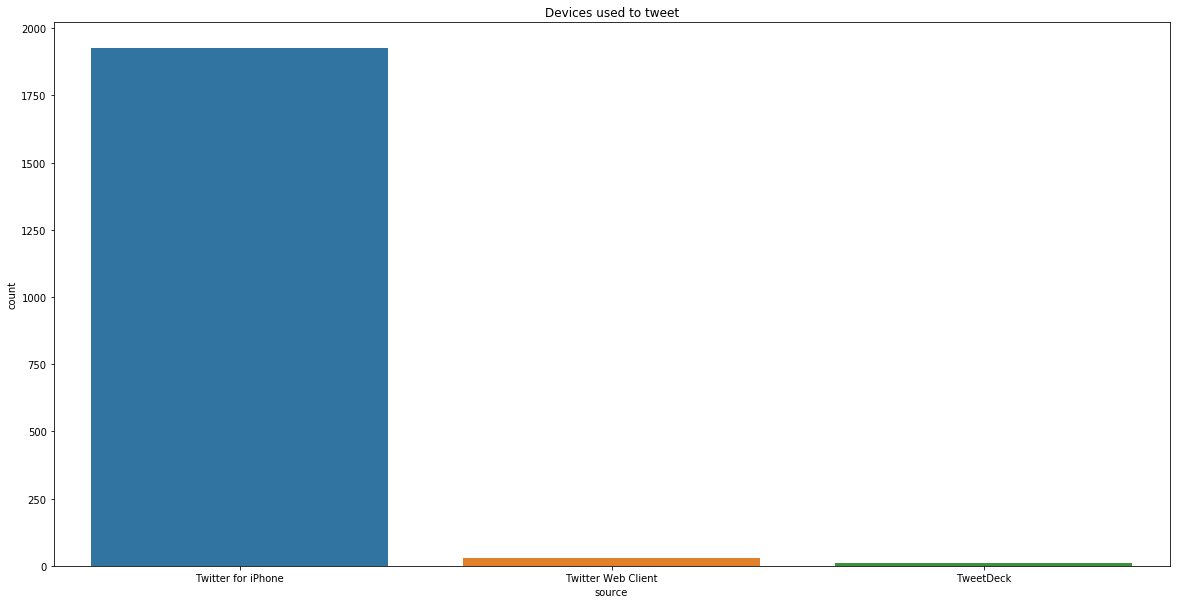

In [655]:
plt.figure(figsize= (20,10))
sns.countplot(data = df_final, 
              x = df_final["source"])
plt.title("Devices used to tweet")

The user has tweeted most of his tweets from Twitter for iPhone

<b> Checking the relation between retweets and favourite count

C:\Users\anubh\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\anubh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


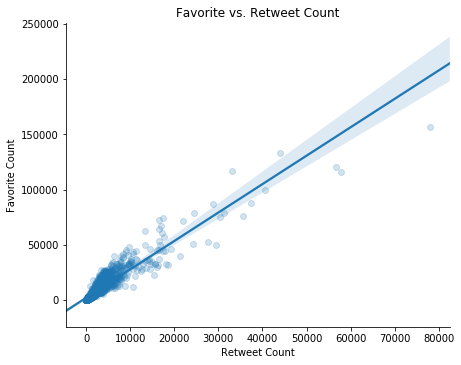

In [656]:
#Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweets", 
           y="favorites", 
           data=df_final,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

Favourites and Retweets are positively correlated.Most of the data falls below 4000 favourite and 2000 retweets

<b>Plotting a line chart for rating over the time</b>

Text(0.5, 1.0, 'Ratings over time')

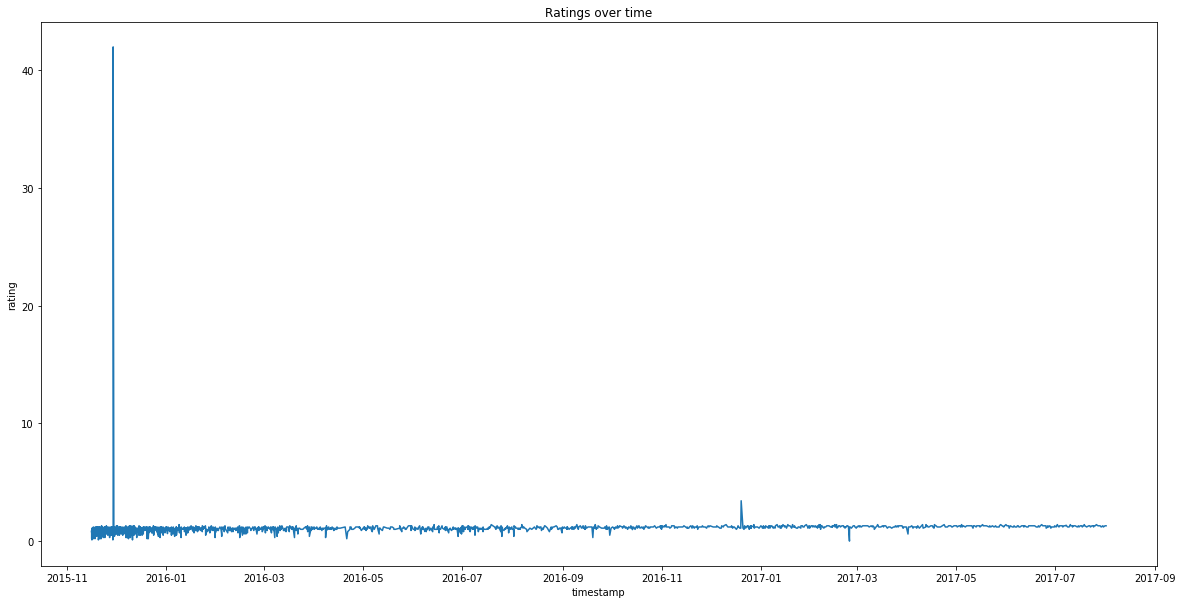

In [657]:
plt.figure(figsize = (20,10))
sns.lineplot(x =df_final["timestamp"], y =df_final["rating"])
plt.title("Ratings over time")

Most of the rating are below 3 , but there is a sudden and unusual increase in rating in 2015-12

<b> Checking different types of dog types </b>

Text(0.5, 1.0, 'Different Dog types')

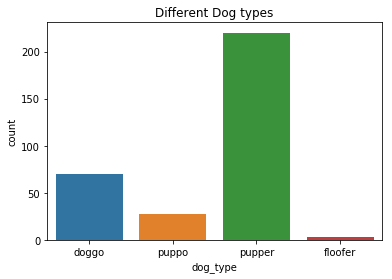

In [658]:
sns.countplot(data = df_final ,x =  df_final["dog_type"])
plt.title("Different Dog types")

Pupper has the highest count among all the dog types

<b> Checking Top 10 breeds of dog</b>

Text(0.5, 1.0, 'Top 10 breeds of dogs')

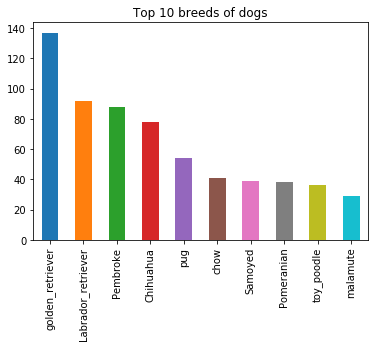

In [659]:
df_final["p1"].value_counts()[:10].plot(kind = "bar")
plt.title("Top 10 breeds of dogs")

Golden retriever is the most owned dog breed